<a href="https://colab.research.google.com/github/aakarsh1227/Breast_cancer_Prediction/blob/main/DS_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Loading Dataset

In [ ]:
df = pd.read_csv('/content/data.csv')

Data Preprocessing
Convert object columns to numeric

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

Parse timestamp and extract features

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

Filling missing values with median

In [ ]:
df.fillna(df.median(numeric_only=True), inplace=True)

Drop rows where target is missing

In [ ]:
df.dropna(subset=['equipment_energy_consumption'], inplace=True)

Feature Selection process

In [ ]:
target = 'equipment_energy_consumption'
drop_cols = ['timestamp', 'equipment_energy_consumption', 'random_variable1', 'random_variable2']
X = df.drop(columns=drop_cols)
y = df[target]

Train and test split process

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest processing(Model Training)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

XGBoost process

In [ ]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

Evaluation process

In [ ]:
def evaluate_model(name, y_true, y_pred):
    print(f"📌 {name} Evaluation:")
    print(f"  MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"  R²:   {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)

In [ ]:
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)

📌 Random Forest Evaluation:
  MAE:  71.31
  RMSE: 174.63
  R²:   0.0549
----------------------------------------
📌 XGBoost Evaluation:
  MAE:  72.88
  RMSE: 175.77
  R²:   0.0426
----------------------------------------


Feature Importance Plot

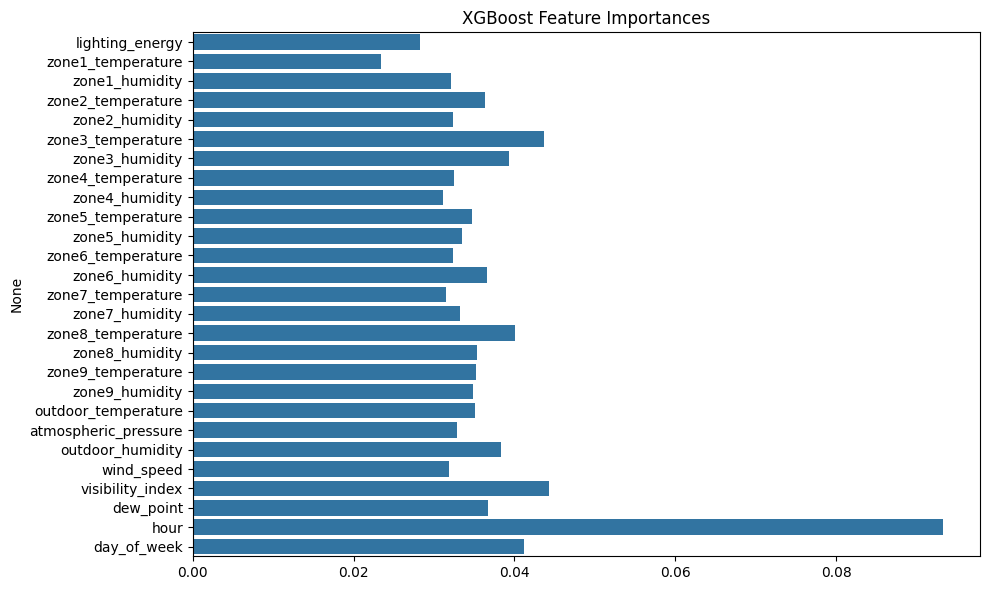

In [ ]:
plt.figure(figsize=(10, 6))
importances = xgb.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()